In [7]:
!pip install PySastrawi

In [212]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from PIL import Image
import requests
import numpy as np

In [253]:
data = pd.read_csv('./data_metpen.csv')
data.head()

,NRP,Judul,DOBING 1,DOBING 2,Ruangan
0,160416019,Pembuatan Aplikasi Pendidikan Bahasa Inggris G...,Melissa,Lisana,ITDD TC 2
1,160416023,Pembuatan Aplikasi Pencarian Salon dengan Meto...,Fitri,Felix,ITDD TC 2
2,160416026,Pengembangan Fitur Testimoni dan Rating yang V...,Fitri,Felix,ITDD TC 2
3,160416050,Pembuatan Sistem Kinerja Karyawan dengan Metod...,Fitri,Felix,ITDD TC 2
4,160416149,Pengembangan Kakas Bantu Untuk Pengujian Hasil...,Fitri,Felix,ITDD TC 2


In [142]:
data['NRP'] = pd.to_numeric(data['NRP'])

In [218]:
informatika = pd.DataFrame(columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"])
multimedia = pd.DataFrame(columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"])
sisfor = pd.DataFrame(columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"])
for row in data['NRP']:
    nrp = str(row)
    if len(nrp) == 9 or len(nrp) == 7:
        nrp = nrp[3]
        temp = data[data['NRP'] == row].values
        if nrp == '4':
            informatika = informatika.append(pd.DataFrame(data=[[temp[0][0], temp[0][1], temp[0][2], temp[0][3], temp[0][4]]], columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"]))
            #print('Informatika')
        elif nrp == '7':
            sisfor = sisfor.append(pd.DataFrame(data=[[temp[0][0], temp[0][1], temp[0][2], temp[0][3], temp[0][4]]], columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"]))
            #print('Sistem Informasi')
        else:
            multimedia = multimedia.append(pd.DataFrame(data=[[temp[0][0], temp[0][1], temp[0][2], temp[0][3], temp[0][4]]], columns=["NRP", "Judul", "DOBING 1", "DOBING 2", "Ruangan"]))
            #print('Multimedia')

In [24]:
ruangan = []
for row in data['Ruangan']:
    if row not in ruangan:
        ruangan.append(row)
ruangan

['ITDD TC 2',
 'PCE',
 'Rapat TC 2',
 'TB 1.9',
 'TC 4.A',
 'TC 4.B',
 'TC 4.C',
 'TC 4.D']

In [57]:
itdd = data[data['Ruangan'] == 'ITDD TC 2']
itdd

,NRP,Judul,DOBING 1,DOBING 2,Ruangan
0,160416019,Pembuatan Aplikasi Pendidikan Bahasa Inggris G...,Melissa,Lisana,ITDD TC 2
1,160416023,Pembuatan Aplikasi Pencarian Salon dengan Meto...,Fitri,Felix,ITDD TC 2
2,160416026,Pengembangan Fitur Testimoni dan Rating yang V...,Fitri,Felix,ITDD TC 2
3,160416050,Pembuatan Sistem Kinerja Karyawan dengan Metod...,Fitri,Felix,ITDD TC 2
4,160416149,Pengembangan Kakas Bantu Untuk Pengujian Hasil...,Fitri,Felix,ITDD TC 2
5,160815059,Pembuatan Board Game Kisah Tokoh Alkitab untuk...,Melissa,Ferdi,ITDD TC 2
6,160816002,Pembuatan Buku Pop-Up Cerita Alkitab Kemah Suc...,Melissa,Hendra,ITDD TC 2
7,160816010,Pembuatan Aplikasi Alat Musik,Melissa,Andre,ITDD TC 2
8,160816014,Pembuatan Board Game Matematika Pecahan,Melissa,Andre,ITDD TC 2
9,160816045,Pembuatan Video Dokumenter Gaya Hidup yang Mer...,Melissa,Andre,ITDD TC 2


In [467]:
dobing = []
for row in data['DOBING 1']:
    row = row.replace(' ', '')
    if row not in dobing and row != "Daniel" and row != "joko":
        dobing.append(row)
for row in data['DOBING 2']:
    row = row.replace(' ', '')
    if row not in dobing and row != "Daniel" and row != "joko":
        dobing.append(row)
dobing

['Melissa',
 'Fitri',
 'Joko',
 'Lisana',
 'Heru',
 'Dhiani',
 'Bambang',
 'Liliana',
 'Maya',
 'Andre',
 'Vincent',
 'Ellysa',
 'Hendra',
 'DanielHP',
 'DanielS',
 'Budi',
 'Ferdi',
 'Felix',
 'Susana',
 'Delta',
 'Monica',
 'Endah',
 'Njoto',
 'Naufal']

In [83]:
def preprocess(text):
    text = text.str.replace(':', '')
    text = text.str.replace(',', '')
    text = text.str.lower()
    return text

In [84]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [85]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [86]:
from matplotlib import cm

In [308]:
def generateImage(words, title=""):
    #img = Image.open(requests.get("https://s3-us-west-2.amazonaws.com/jumpermedia.co/uploads/2017/07/image9.jpg", stream=True).raw)
    #mask = np.array(img)
    wc = WordCloud(background_color='white', colormap=cm.viridis, scale=5, collocations=False).generate_from_text(" ".join(words))

    plt.figure(figsize=(7,7))
    plt.imshow(wc, interpolation="bilinear", origin='upper')
    plt.axis("off")
    plt.title(title, fontdict={'size':18, 'weight': 'bold'})

In [309]:
def commons(visualize, title=""):
    visualize = preprocess(visualize)

    text = visualize.astype(str)
    text = [stemmer.stem(record) for record in text]

    words = [word_tokenize(record) for record in text]

    wordsFiltered = []
    for record in words:
        for word in record:
            if word not in stopwords:
                wordsFiltered.append(word)

    generateImage(wordsFiltered, title=title)
    return wordsFiltered

In [533]:
def unique(wordsFiltered, title=""):
    wordcount = {}
    for term in wordsFiltered:
      if term not in wordcount:
        wordcount[term] = 1
      else:
        wordcount[term] += 1

    unique = {}
    for term in wordcount:
        unique[term] = wordcount[term] - 47
        if(unique[term]) < 0:
            unique[term] = unique[term] * -1

    uniqueWordsFiltered = []
    for term in unique:
        for i in range(unique[term]):
            uniqueWordsFiltered.append(term)

    generateImage(uniqueWordsFiltered, title=title)

Text(0.5, 1.0, '')

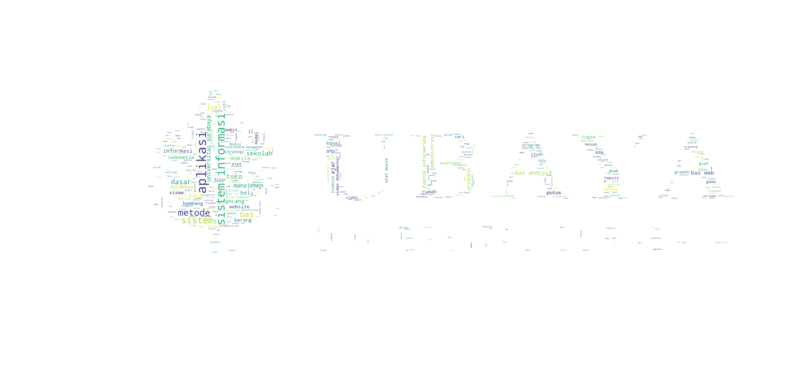

In [532]:
visualize = data['Judul']
visualize = preprocess(visualize)

text = visualize.astype(str)
text = [stemmer.stem(record) for record in text]

words = [word_tokenize(record) for record in text]

wordsFiltered = []
for record in words:
    for word in record:
        if word not in stopwords:
            wordsFiltered.append(word)

img = Image.open(requests.get("https://i.ibb.co/sJdwn8R/ubaya.jpg", stream=True).raw)
mask = np.array(img)
wc = WordCloud(background_color='white', max_words=2000, mask=mask).generate(" ".join(wordsFiltered))

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("", fontdict={'size':18, 'weight': 'bold'})

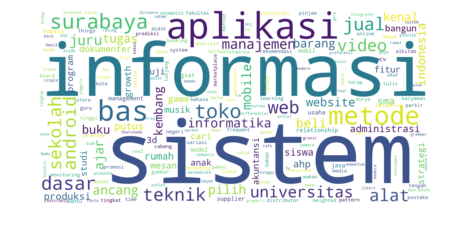

In [230]:
#Secara keseluruhan
visualize = data['Judul']
wordsFiltered = commons(visualize)

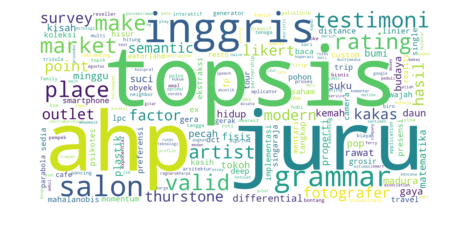

In [231]:
#Secara Keseluruhan
unique(wordsFiltered)

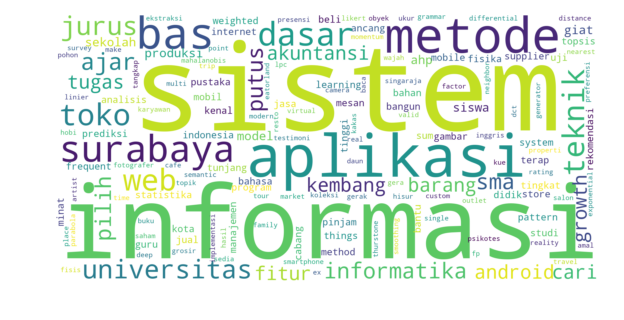

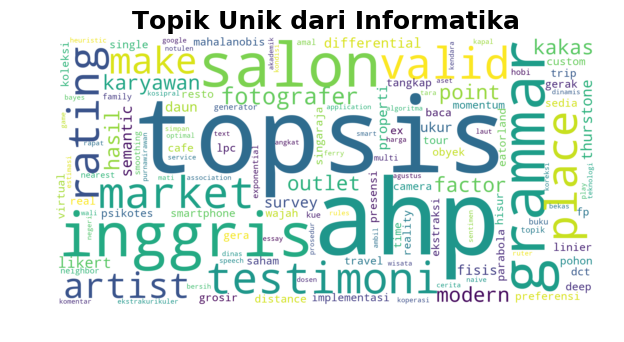

In [537]:
#Berdasarkan Jurusan Informatika
arr = informatika
visualize = arr['Judul']
wordsFiltered = commons(visualize)
unique(wordsFiltered, title="Topik Unik dari Informatika")

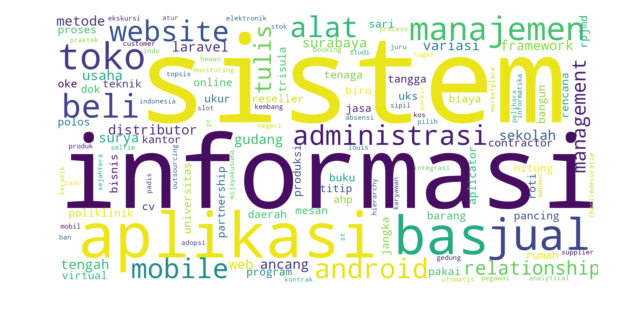

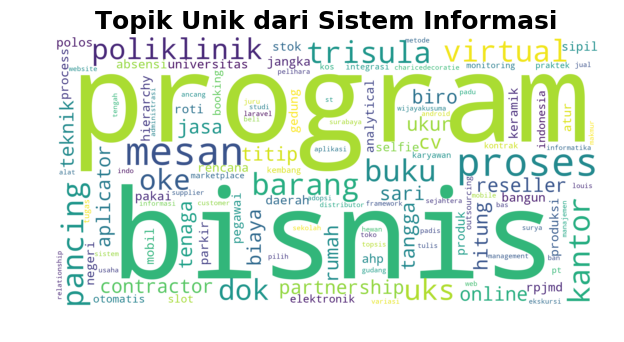

In [538]:
#Berdasarkan Sistem Informasi
arr = sisfor
visualize = arr['Judul']
wordsFiltered = commons(visualize)
unique(wordsFiltered, title="Topik Unik dari Sistem Informasi")

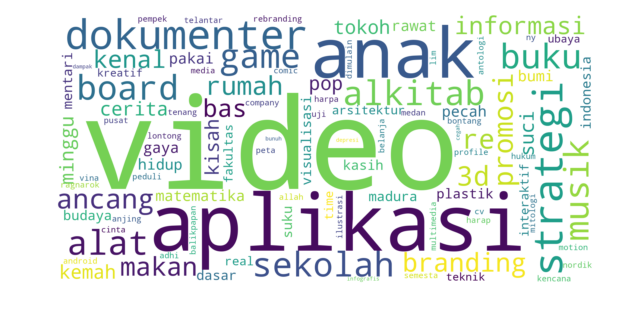

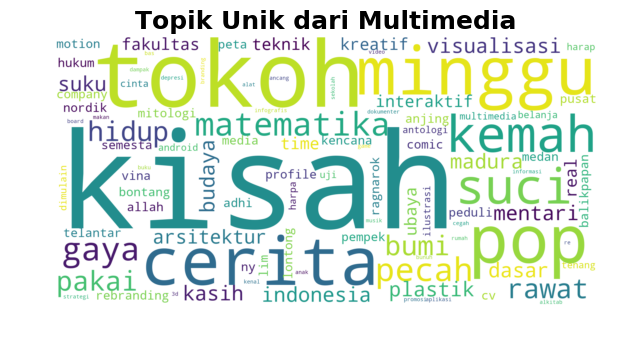

In [539]:
#Berdasarkan Multimedia
arr = multimedia
visualize = arr['Judul']
wordsFiltered = commons(visualize)
unique(wordsFiltered, title="Topik Unik dari Multimedia")

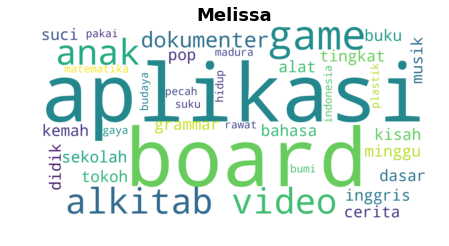

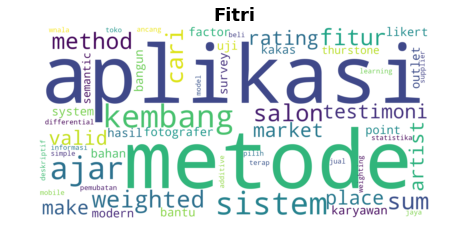

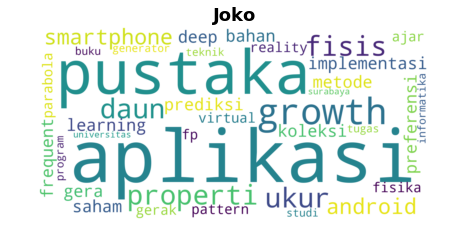

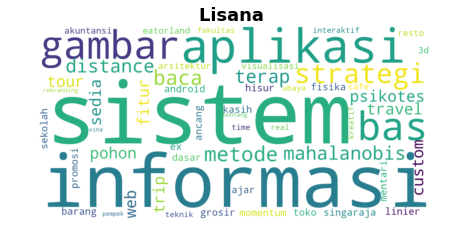

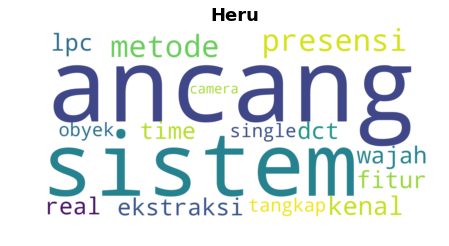

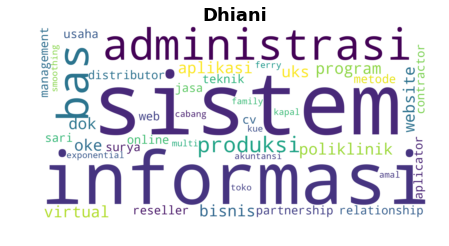

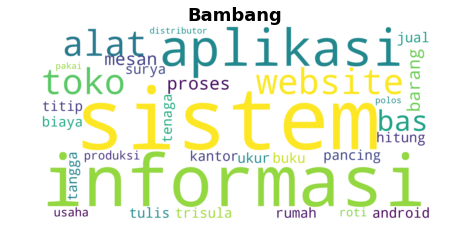

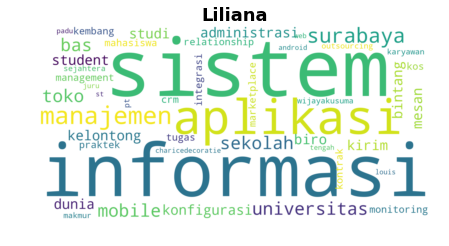

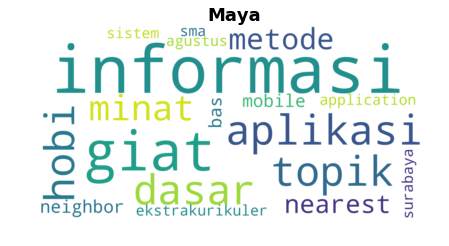

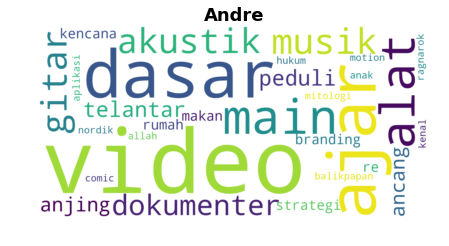

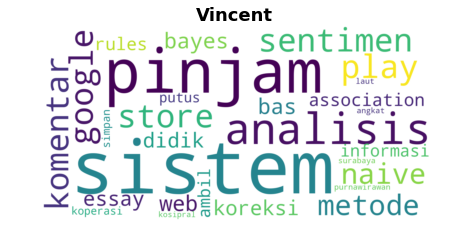

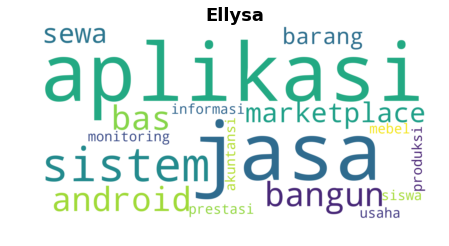

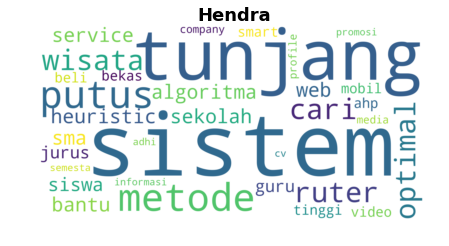

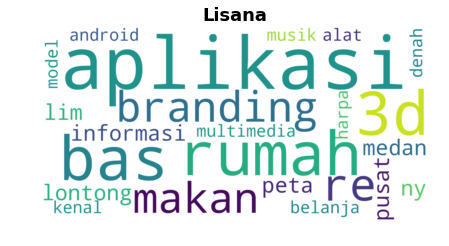

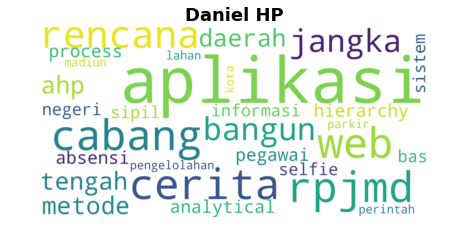

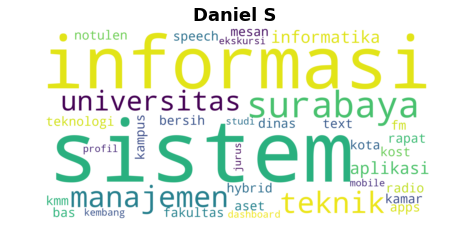

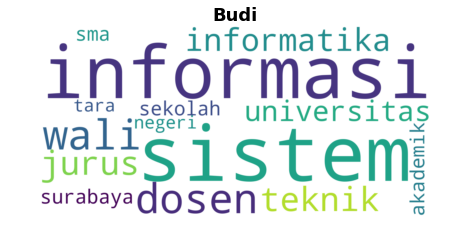

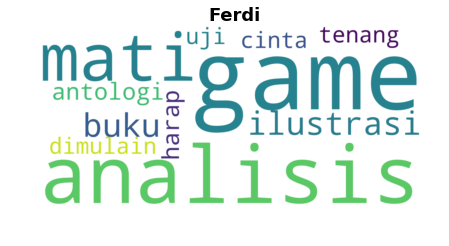

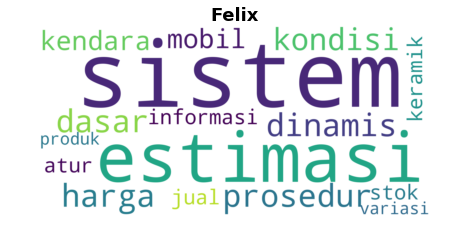

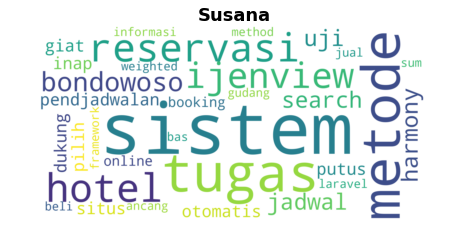

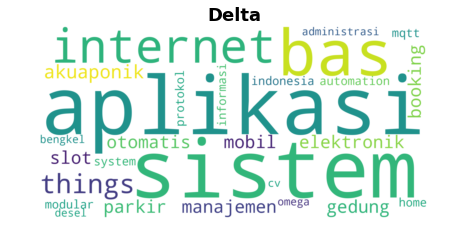

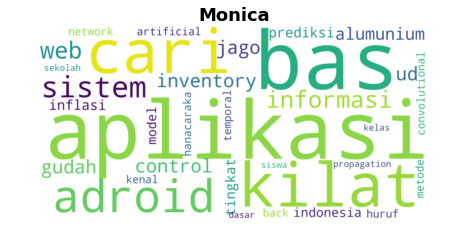

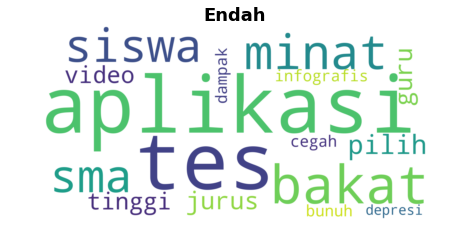

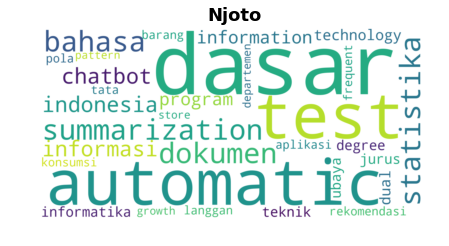

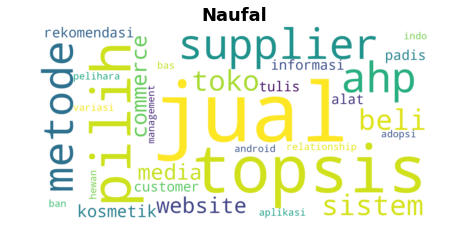

In [317]:
#print(data[data['DOBING 1'] == dobing[0]])
for row in dobing:
    arr = data[data['DOBING 1'] == row]
    if not arr.empty:
        visualize = arr['Judul']
        wordsFiltered = commons(visualize, title=row)
    #unique(wordsFiltered)

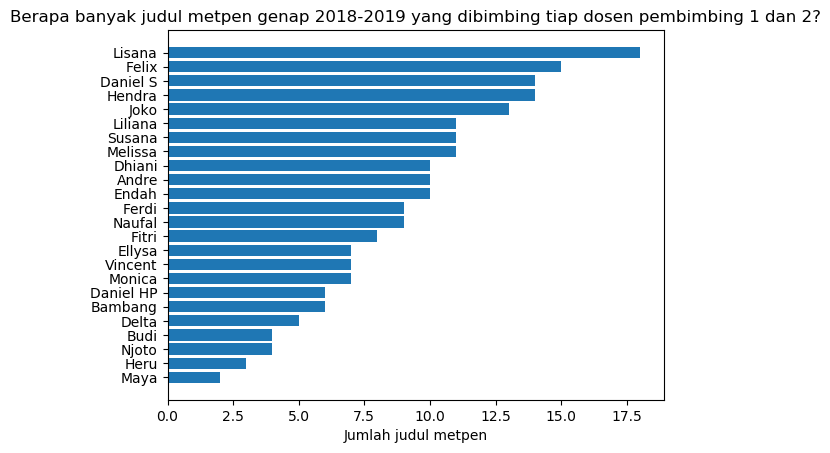

In [529]:
pd_dobing = [data['DOBING 1'], data['DOBING 2']]
pd_dobing = pd.concat(pd_dobing)

pd_dobing.loc[pd_dobing == 'joko'] = 'Joko'
pd_dobing.loc[pd_dobing == 'Lisana '] = 'Lisana'

pd_dobing = pd_dobing.drop(pd_dobing.loc[pd_dobing == 'Daniel'].index)

jumlah = pd_dobing.value_counts(sort=True)
frekuensi_dobing = 0
for index, row in enumerate(jumlah):
    frekuensi_dobing = np.append(frekuensi_dobing, row)
frekuensi_dobing = np.delete(frekuensi_dobing, 0)
#print([frekuensi_dobing])
dobing1 = []
for row in jumlah.index:
    dobing1.append(row)
    
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()
        
# Example data
people = dobing1
y_pos = np.arange(len(people))
performance = frekuensi_dobing
#performance = [3 + 10 * np.random.rand(len(people))]
error = np.random.rand(len(people))

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Jumlah judul metpen')
ax.set_title('Berapa banyak judul metpen genap 2018-2019 yang dibimbing tiap dosen pembimbing 1 dan 2?')

plt.show()

25
25


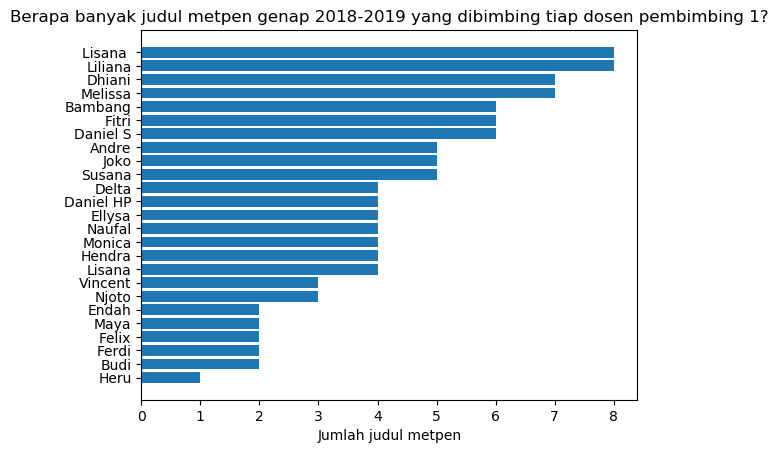

In [528]:
jumlah = data['DOBING 1'].value_counts(sort=True)
frekuensi_dobing = 0
for index, row in enumerate(jumlah):
    frekuensi_dobing = np.append(frekuensi_dobing, row)
frekuensi_dobing = np.delete(frekuensi_dobing, 0)
#print([frekuensi_dobing])
dobing1 = []
for row in jumlah.index:
    dobing1.append(row)

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()
        
# Example data
people = dobing1
y_pos = np.arange(len(people))
performance = frekuensi_dobing
#performance = [3 + 10 * np.random.rand(len(people))]
error = np.random.rand(len(people))

print(len(people))
print(len(frekuensi_dobing))

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Jumlah judul metpen')
ax.set_title('Berapa banyak judul metpen genap 2018-2019 yang dibimbing tiap dosen pembimbing 1?')

plt.show()

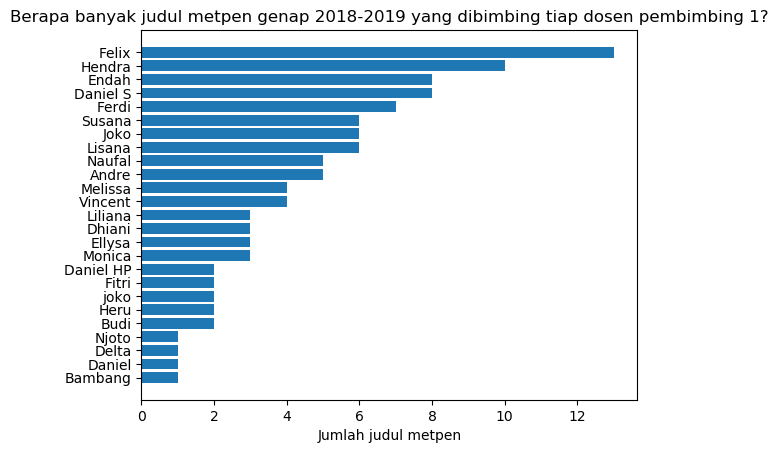

In [526]:
jumlah = data['DOBING 2'].value_counts(sort=True)
frekuensi_dobing = 0
for index, row in enumerate(jumlah):
    frekuensi_dobing = np.append(frekuensi_dobing, row)
frekuensi_dobing = np.delete(frekuensi_dobing, 0)
#print([frekuensi_dobing])
dobing1 = []
for row in jumlah.index:
    dobing1.append(row)

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()
        
# Example data
people = dobing1
y_pos = np.arange(len(people))
performance = frekuensi_dobing
#performance = [3 + 10 * np.random.rand(len(people))]
error = np.random.rand(len(people))

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Jumlah judul metpen')
ax.set_title('Berapa banyak judul metpen genap 2018-2019 yang dibimbing tiap dosen pembimbing 1?')

plt.show()